<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/mini_batch_gradient_descent_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

In [66]:
df = pd.read_csv('/content/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [67]:
df.shape

(20, 3)

In [68]:
df.isna().any()

,0
area,False
bedrooms,False
price,False


In [69]:
# I need to rescale my data
sx = MinMaxScaler()
sy = MinMaxScaler()



In [70]:
X = df.drop(['price'], axis = 1)
X.head()

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2


In [71]:
scaled_X = sx.fit_transform(X)
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [72]:
y = df[['price']]
y.head()

,price
0,39.07
1,120.00
2,62.00
3,75.00
4,51.00


In [73]:
scaled_y = sy.fit_transform(y)
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [74]:
w = np.ones(shape=(X.shape))
w

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

1. IMPLEMENTING BATCH GRADIENT DESCENT

In [75]:
def batch_gradient_descent(X, y, epochs):
  rate = 0.01
  w = np.ones(shape=(X.shape[1]))
  bias = 0
  n = X.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w,X.T) + bias
    loss = np.mean(np.square(y - y_predicted))
    dw = -(2/n) * np.dot((y - y_predicted), X)
    bias_d = -(2/n) * np.sum(y - y_predicted)

    w = w - (rate * dw)

    bias = bias - (rate * bias_d)

    if i%10 == 0 :
      cost_list.append(loss)
      epoch_list.append(i)


  return w, bias , loss , cost_list, epoch_list

In [76]:
w, bias, loss = batch_gradient_descent(scaled_X, scaled_y.flatten(), 500)
w, bias , loss


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [77]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [81]:
b = sx.transform([[1056, 2]])
b[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.08827586, 0.25      ])

In [87]:
def predict(area, bedrooms, w, bias):
  b = sx.transform([[area, bedrooms]])[0]
  scaled_price  = (w[0] * b[0]) + (w[1] * b[1]) + bias
  price  = sy.inverse_transform([[scaled_price]])[0]
  return price

In [88]:
predict(1521, 3, w, bias)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([70.16988315])

#Implementing Stochastic gradient descent

In [98]:
#we only need to play around with indexes
random_index = random.randint(0,6)
random_index

2

In [101]:
#just to see what my code is doing before I put it into a function
np.dot(w,scaled_X[random_index].T).shape

()

In [108]:
scaled_X[random_index].shape

(2,)

In [118]:
def stochastic_gradient_descent(X, y , epochs):
  rate = 0.01
  w = np.ones(shape=(X.shape[1]))
  n = X.shape[0]
  bias = 0
  cost_list = []
  epoch_list = []


  for i in range(epochs) :
    random_index = random.randint(0,n-1)
    X_train = X[random_index]
    y_train = y[random_index]

    y_predicted = np.dot(w,X_train.T) + bias
    loss = np.square(y_train - y_predicted)
    wd = -(2/n) * np.dot(y_train - y_predicted, X_train)
    bias_d = -(2/n) * (y_train - y_predicted)

    w = w - (rate * wd)
    bias = bias - (rate * bias_d)

    if i % 10 == 0 :
      cost_list.append(loss)
      epoch_list.append(i)

  return w, bias , loss , cost_list, epoch_list









In [125]:
w, bias , loss, cost_list, epoch_list = stochastic_gradient_descent(scaled_X, scaled_y.flatten() , 10000)
w, bias , loss

(array([0.70801494, 0.67452187]), -0.23197760893783054, 0.011352024838407143)

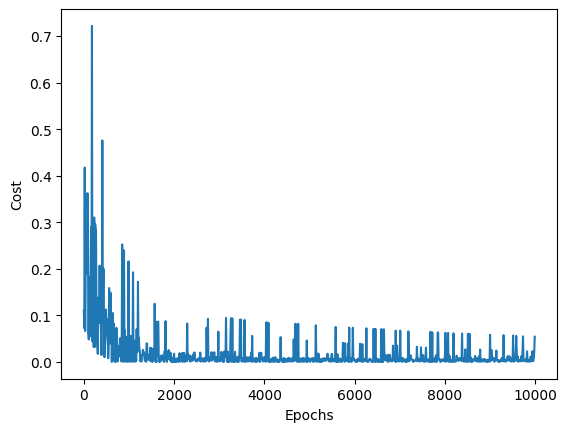

In [126]:
plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.plot(epoch_list, cost_list)



#Mini batch gradient descent(mbdg)

In [130]:
random_index = np.random.permutation(20)
random_index

array([ 6, 17,  3, 12,  1, 14,  7, 13,  5, 10,  4,  8, 15,  0,  2, 18,  9,
       11, 16, 19])

In [150]:
def mbgd(X, y, epochs, batch_size ):
  w = np.ones(shape=(X.shape[1]))
  n = X.shape[1]
  bias = 0
  rate = 0.01
  cost_list = []
  epochs_list = []
  if batch_size >= n:
    batch_size = n
  for i in range(epochs):
    random_index = np.random.permutation(n)
    X_tmp = X[random_index]
    y_tmp = y[random_index]

    for j in range(0, n, batch_size):
      Xj = X_tmp[j:j+batch_size]
      yj = y_tmp[j:j+batch_size]

      y_predicted = np.dot(w,Xj.T) + bias
      loss =   np.mean(np.square(yj - y_predicted))
      dw =  -(2/n) * np.dot((yj-y_predicted), Xj.T)
      bias_d = -(2/n) * np.sum(yj-y_predicted)

      w = w - (rate * dw)
      bias = bias - (rate * bias_d)

      if i%10 == 0:
        cost_list.append(loss)
        epochs_list.append(i)

  return w, bias , loss ,  cost_list, epochs_list














In [153]:
w, bias, loss, cost_list, epochs_list = mbgd(scaled_X, scaled_y.flatten(), 1000, 5 )
w, bias , loss

(array([0.81907284, 0.85847559]), -0.3669461881196402, 0.01769597886425547)

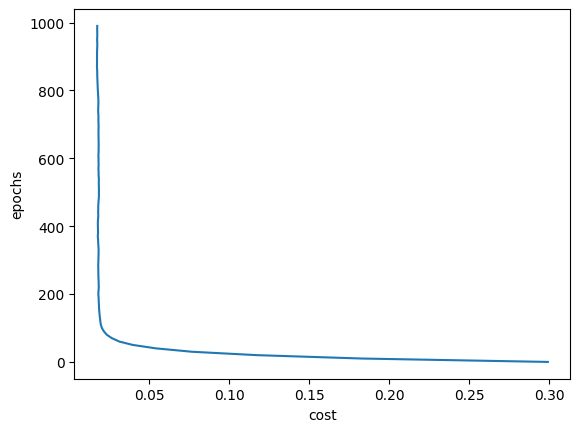

In [154]:
plt.xlabel('cost')
plt.ylabel('epochs')
plt.plot(cost_list, epochs_list)